<a href="https://colab.research.google.com/github/rhuancborges/praticas-programacaoMatematica/blob/main/problema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática 2 (AP2)
### GCC118 - Programação Matemática


**Nome**: Rhuan Campideli Borges (202210075)

**Turma**: 10A





# Enunciado - Problema 2

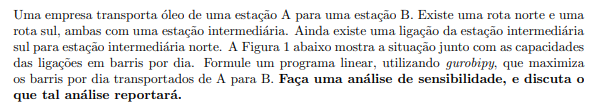

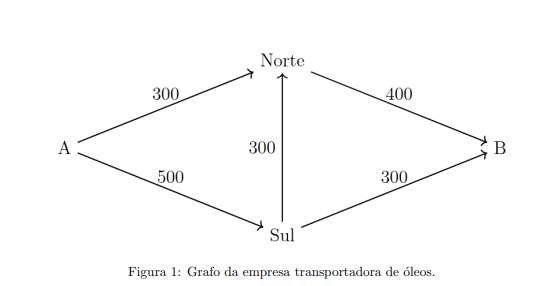

# 1 - Modelagem Matemática e resolução

## Dados
Para iniciar nossa modelagem, podemos retirar do enunciado do problema alguns dados importantes:

* Convenção de ordem para enumeração das estações: $A-Norte-Sul-B$
*  $c_{(i,j)}$ -> capacidade de transporte de barris por dia da estação $i$ para a estação $j$

**Matriz de capacidades ($C$)**:
$$
\mathbf{C} = \begin{pmatrix} 0_{(A, A)} & 300_{(A, Norte)} & 500_{(A, Sul)} & 0_{(A, B)} \\  0_{(Norte, A)} & 0_{(Norte, Norte)} & 0_{(Norte, Sul)} & 400_{(Norte, B)} \\ 0_{(Sul, A)} & 300_{(Sul, Norte)} & 0_{(Sul, Sul)} & 300_{(Sul, B)} \\ 0_{(B, A)} & 0_{(B, Norte)} & 0_{(B, Sul)} & 0_{(B, B)} \end{pmatrix}
$$


## Variáveis de decisão
As variáveis do problema (e também aquilo que queremos determinar) é a quantidade de barris transportados por dia por cada aresta do grafo. Sendo assim, tem-se:

**Vetor de variáveis ($x$)**:
$$
\mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{pmatrix},
$$

sendo $x_1$ a quantidade de barris transportados entre a estação A e estação Norte, $x_2$ a quantidade de barris transportados entre a estação A e estação Sul, $x_3$ a quantidade de barris transportados entre a estação Norte e estação B, $x_4$ a quantidade de barris transportados entre a estação Sul e estação Norte e $x_5$ a quantidade de barris transportados entre a estação Sul e estação B.

\\

### Tipo

As variáveis são contínuas, ou seja, $x \geq 0 $.

\\

## Objetivo e função
O objetivo do problema é maximizar a quantidade de barris transportados por dia. Sendo assim, devemos **maximizar** a seguinte função:

$$
f(x) = \sum_{i=1}^{5}x =  x_1 + x_2 + x_3 + x_4 +x_5
$$


## Restrições

As restrições do problema são as seguintes:


### Restrições relacionadas às capacidades de cada aresta do grafo:

* Capacidade de transporte da aresta $(A, Norte)$:
$$
x_1 \leq 300
$$

* Capacidade de transporte da aresta $(A, Sul)$:
$$
x_2 \leq 500
$$

* Capacidade de transporte da aresta $(Norte, B)$:
$$
x_3 \leq 400
$$

* Capacidade de transporte da aresta $(Sul, Norte)$:
$$
x_4 \leq 300
$$

* Capacidade de transporte da aresta $(Sul, B)$:
$$
x_5 \leq 300
$$

### Restrição relacionada à não estocagem de barris nas estações intermediárias (tudo o que chega, sai):

* Estação Norte - quantidade que chega pela arestas $(A, Norte)$ e $(Sul, Norte)$ deve ser igual à quantidade que sai pela aresta $(Norte, B)$:
$$
x_3 = x_1 + x_4
$$

* Estação Sul -  quantidade que chega pela aresta $(A, Sul)$ deve ser igual à quantidade que sai pelas arestas $(Sul, Norte)$ e $(Sul, B)$
$$
x_2 = x_4 + x_5
$$

## Instalação da biblioteca Gurobi

In [1]:
!pip install gurobipy

## Declaração do objeto que representa o modelo

In [2]:
from gurobipy import Model, GRB

# Criar o modelo
modelo = Model("barris")

Restricted license - for non-production use only - expires 2026-11-23


## Variáveis de decisão

In [3]:
ANorte_var = modelo.addVar(name="x_1 (A, Norte)", vtype=GRB.CONTINUOUS, lb=0)
ASul_var = modelo.addVar(name="x_2 (A, Sul)", vtype=GRB.CONTINUOUS, lb=0)
NorteB_var = modelo.addVar(name="x_3 (Norte, B)", vtype=GRB.CONTINUOUS, lb=0)
SulNorte_var = modelo.addVar(name="x_4 (Sul, Norte)", vtype=GRB.CONTINUOUS, lb=0)
SulB_var = modelo.addVar(name="x_5 (Sul, B)", vtype=GRB.CONTINUOUS, lb=0)

## Função objetivo

In [4]:
modelo.setObjective(ANorte_var + ASul_var + NorteB_var + SulNorte_var + SulB_var, GRB.MAXIMIZE)

## Restrições

*  Capacidade de transporte da aresta $(A, Norte)$:

In [5]:
modelo.addConstr(ANorte_var <= 300, "capacidade_ANorte")

<gurobi.Constr *Awaiting Model Update*>

* Capacidade de transporte da aresta $(A, Sul)$:

In [6]:
modelo.addConstr(ASul_var <= 500, "capacidade_ASul")

<gurobi.Constr *Awaiting Model Update*>

* Capacidade de transporte da aresta $(Norte, B)$:

In [7]:
modelo.addConstr(NorteB_var <= 400, "capacidade_NorteB")

<gurobi.Constr *Awaiting Model Update*>

* Capacidade de transporte da aresta $(Sul, Norte)$:

In [8]:
modelo.addConstr(SulNorte_var <= 300, "capacidade_SulNorte")

<gurobi.Constr *Awaiting Model Update*>

* Capacidade de transporte da aresta $(Sul, B)$:

In [9]:
modelo.addConstr(SulB_var <= 300, "capacidade_SulB")

<gurobi.Constr *Awaiting Model Update*>

* Estação Norte - quantidade que chega pela arestas $(A, Norte)$ e $(Sul, Norte)$ deve ser igual à quantidade que sai pela aresta $(Norte, B)$:

In [10]:
modelo.addConstr(ANorte_var + SulNorte_var == NorteB_var, "naoEstocagem_Norte")

<gurobi.Constr *Awaiting Model Update*>

* Estação Sul -  quantidade que chega pela aresta $(A, Sul)$ deve ser igual à quantidade que sai pelas arestas $(Sul, Norte)$ e $(Sul, B)$

In [11]:
modelo.addConstr(SulNorte_var + SulB_var == ASul_var, "naoEstocagem_Sul")

<gurobi.Constr *Awaiting Model Update*>

## Resolvendo o problema

In [12]:
modelo.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 7 rows, 5 columns and 11 nonzeros
Model fingerprint: 0x426ccd21
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+02, 5e+02]
Presolve removed 5 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 5 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.8000000e+03   3.750000e+01   0.000000e+00      0s
       2    1.6000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.600000000e+03


## Imprimindo as soluções do problema

In [13]:
if(modelo.status == GRB.OPTIMAL):
  print(f"Barris (A, Norte): {ANorte_var.X}")
  print(f"Barris (A, Sul): {ASul_var.X}")
  print(f"Barris (Norte, B): {NorteB_var.X}")
  print(f"Barris (Sul, Norte): {SulNorte_var.X}")
  print(f"Barris (Sul, B): {SulB_var.X}")
  print(f"Valor máximo de barris por dia: {modelo.objVal}")

Barris (A, Norte): 200.0
Barris (A, Sul): 500.0
Barris (Norte, B): 400.0
Barris (Sul, Norte): 200.0
Barris (Sul, B): 300.0
Valor máximo de barris por dia: 1600.0


## Análise de sensibilidade

In [14]:
print("\nIntervalos de Custos (Vetor de Custos):")
for variavel in modelo.getVars():
  print(f"Variável {variavel.VarName}:")
  print(f"  valor mínimo do custo (SAObjLow): {variavel.SAObjLow}")
  print(f"  valor máximo do custo (SAObjUp): {variavel.SAObjUp}")

print("\nIntervalos de Recursos (Vetor de Recursos):")
for restricao in modelo.getConstrs():
  print(f"Restrição {restricao.ConstrName}:")
  print(f"  valor mínimo do recurso (SARHSLow): {restricao.SARHSLow}")
  print(f"  valor máximo do recurso (SARHSUp): {restricao.SARHSUp}")
  print(f"  valor da variável dual associada: {restricao.Pi}")


Intervalos de Custos (Vetor de Custos):
Variável x_1 (A, Norte):
  valor mínimo do custo (SAObjLow): -0.0
  valor máximo do custo (SAObjUp): 2.0
Variável x_2 (A, Sul):
  valor mínimo do custo (SAObjLow): -0.0
  valor máximo do custo (SAObjUp): inf
Variável x_3 (Norte, B):
  valor mínimo do custo (SAObjLow): -1.0
  valor máximo do custo (SAObjUp): inf
Variável x_4 (Sul, Norte):
  valor mínimo do custo (SAObjLow): -0.0
  valor máximo do custo (SAObjUp): 2.0
Variável x_5 (Sul, B):
  valor mínimo do custo (SAObjLow): -0.0
  valor máximo do custo (SAObjUp): inf

Intervalos de Recursos (Vetor de Recursos):
Restrição capacidade_ANorte:
  valor mínimo do recurso (SARHSLow): 200.0
  valor máximo do recurso (SARHSUp): inf
  valor da variável dual associada: 0.0
Restrição capacidade_ASul:
  valor mínimo do recurso (SARHSLow): 400.0
  valor máximo do recurso (SARHSUp): 600.0
  valor da variável dual associada: 1.0
Restrição capacidade_NorteB:
  valor mínimo do recurso (SARHSLow): 200.0
  valor má

O retorno dado pela análise de sensibilidade a respeito dos custos das variáveis não possui tanta relevância no problema, uma vez que queremos maximizar a quantidade de barris transportados por dia e o custo de transporte não influencia na solução do problema.

Em relação às restrições, nota-se, pela análise de sensibilidade, que as restrições do tipo "capacidade" cujas variáveis duais são iguais a 0.0 representam arestas cujas capacidades máximas de transporte não foram atingidas, ou seja, existe uma certa folga nessas restrições.